In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data/Hearts_Dummy.csv")
df = df[df['Thal_normal'] == 1]
df = df.dropna()
df_AHDYes = df[df['AHD_Yes'] == 1]
df_AHDNo = df[df['AHD_Yes'] == 0]

##Part A: + signs have heart disease while circles do not have heart disease. There doesn't exist a perfect separating hyperplane for any of these plots, as there is no line you could draw that has only + signs on one side and only dots on the other.

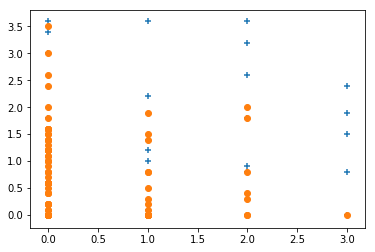

In [3]:
plt.scatter(df_AHDYes['Ca'], df_AHDYes['Oldpeak'], marker = '+')
plt.scatter(df_AHDNo['Ca'], df_AHDNo['Oldpeak'], marker = 'o')

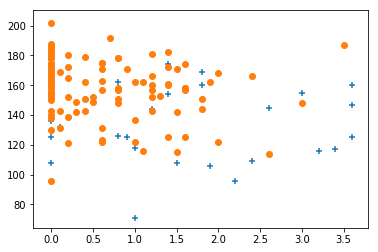

In [4]:
plt.scatter(df_AHDYes['Oldpeak'], df_AHDYes['MaxHR'], marker = '+')
plt.scatter(df_AHDNo['Oldpeak'], df_AHDNo['MaxHR'], marker = 'o')

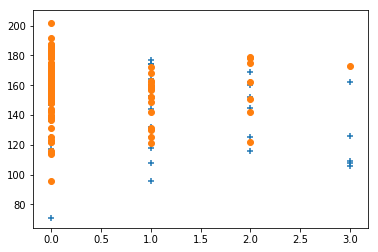

In [5]:
plt.scatter(df_AHDYes['Ca'], df_AHDYes['MaxHR'], marker = '+')
plt.scatter(df_AHDNo['Ca'], df_AHDNo['MaxHR'], marker = 'o')

##Part B: The optimal C is 1000, and the optimal gamma is 0.0001.  The SVM predicts that the given values belong to someone without heart disease. Increasing C will lead to lower bias and higher variance, and the same will happen if increasing gamma. Increasing either of these paramaters too much will lead to overfitting.

In [6]:
X = df[['Ca', 'Oldpeak', 'MaxHR']]
y = df['AHD_Yes']
C_grid = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma_grid = [.0001, 0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': C_grid, 'gamma': gamma_grid}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 5)
grid_search.fit(X, y)
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001}

In [7]:
clf = svm.SVC(gamma = 0.0001, C = 1000)
clf.fit(X, y)
clf.predict([[1., 2.5, 150.]])

array([0], dtype=int64)